### Importing Relevent Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set() # all plot will cover on seaborn style

### Loading the Data.

In [2]:
car_raw = pd.read_csv('1.04. Real-life example.csv')
car_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


* Brand - Car barand. 
* Price - price of the car, and our target column.
* Body - car type.
* Mileage - How many mileage the car has driven. as it is second hand car price prediction project. It is more likely the cas has driven most the price will be less.
* EngineV - Volumne of the car engine, the sports car have larger engine and have higher price and economy car have comparetively smaller engine and lesser price.
* Registration - The car have registration paper or not.
* Year - The year when the car is first bought by the first owner. the older is car will be more cheaper.
* Model - The model of the car.

### Preprocessing the Raw Data

In [3]:
# getting descriptive stats
car_raw.describe(include='all')
# use include = all for getting categorical column also.

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Checking missing values

In [4]:
car_raw.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

`Price` and `EngineV` is only column with missng values. but few of them are missing.

`The Rule of Thumb` says if we are dropiing or removing `5%` or less than that data from the original data. we are safely remove that.

In our this case `172/4344` `=` `0.0395`, we are droping like `3%` of total data, 

In [5]:
# dropping missing values
car_raw.dropna(axis=0, inplace=True)

# axis=1 means we are removing rows not columns
print('Mssing value Droped')

Mssing value Droped


### Exploring Probability Distibutions. (PDFs)

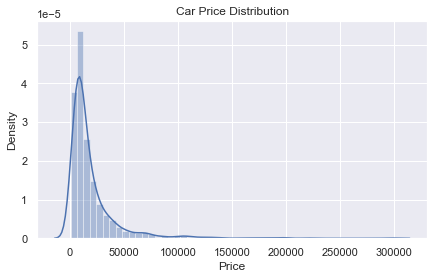

In [6]:
plt.figure(figsize=(7,4))
sns.distplot(car_raw['Price']);
plt.title('Car Price Distribution');

If we check the price range, the values are lies in very strage order. also there are some outliar.

### Dealing with outliar.

The one way is to do that is getting 99% of total data and removing 1% of data.

for that I will use pandas `.quantile()` methode

In [7]:
q = car_raw['Price'].quantile(q = 0.99) # it return a single value
q

129812.51999999981

In [8]:
# updating the data
car_1 = car_raw[car_raw['Price']<q]
car_1.describe() # checking the data.

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


Now if we compare from above describe then we can see the `Price` max value has been relaxed, but it also very far from its mean, but it is acceptable.

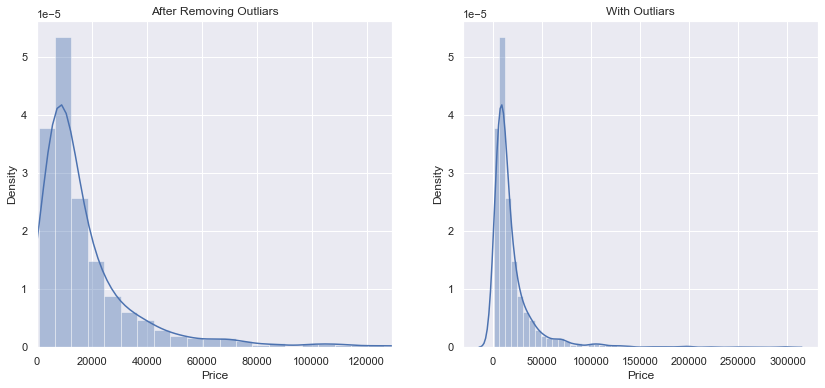

In [9]:
plt.figure(figsize=(14,6))
# plotting distribution graph with seaborn
# plotting the Target Column prices
plt.subplot(1,2,1)
sns.distplot(car_raw['Price']);
plt.title('After Removing Outliars');
plt.xlim(0,129222)

plt.subplot(1,2,2)
sns.distplot(car_raw['Price']);
plt.title('With Outliars');

Now the outliars are far away, Now we can see the Price is more generalized way.

### This similar issue we also have with others columns like `Mileage`, `EngineV` and `Year`

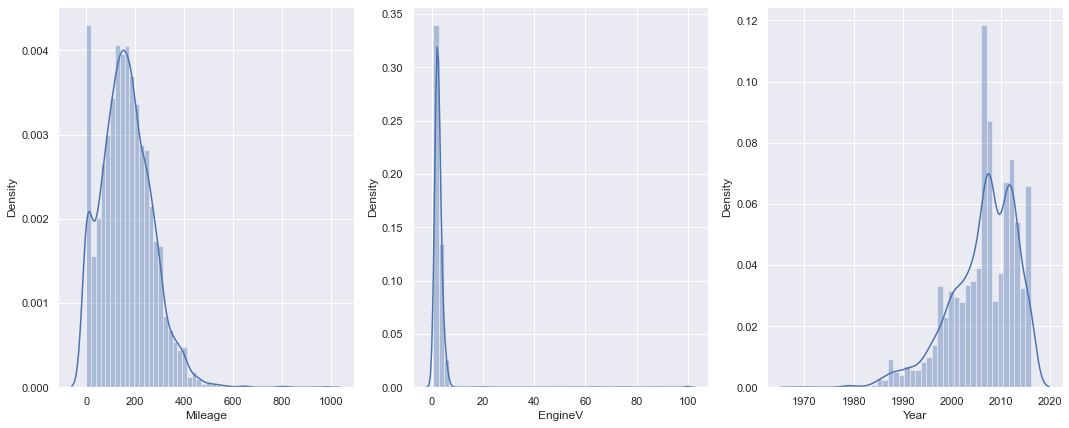

In [10]:
# potting athers numerical columns
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
sns.distplot(car_1['Mileage']);

plt.subplot(1,3,2)
sns.distplot(car_raw['EngineV'])

plt.subplot(1,3,3)
sns.distplot(car_raw['Year']);

The same things is also here. I will perform the same processing here also, kepping only 99% data

In [11]:
## Mileage Column.
q = car_1['Mileage'].quantile(0.99)  # it return a single value
car_2  = car_1[car_1['Mileage']<q]

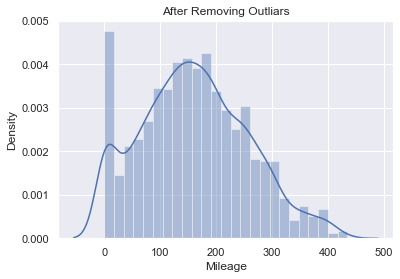

In [12]:
# plotting the Milage column
sns.distplot(car_2['Mileage']);
plt.title('After Removing Outliars');

Now the is much look like normally distributed.

## The EngineV 

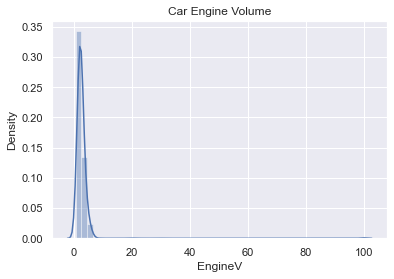

In [13]:
# plotting the enginev column
sns.distplot(car_2['EngineV']);
plt.title('Car Engine Volume');

The engine car volume have bad data. 
No such car are ther with 100 engine volume.

Google search found that the interval should fall on `0.6 to 6.5` for car engine volume.

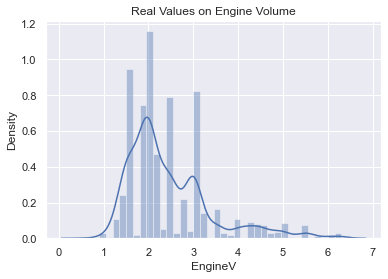

In [14]:
# as here i know the max engine volume can be is 6.5

car_3 = car_2[car_2['EngineV']<6.5]

# plotting the values again
sns.distplot(car_3['EngineV']);
plt.title('Real Values on Engine Volume');

## `Year`

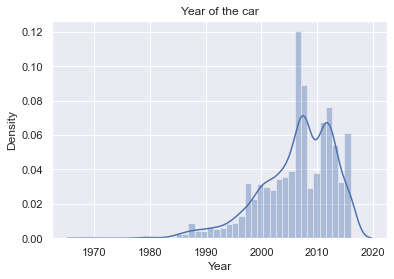

In [15]:
#plotting the year column
sns.distplot(car_3['Year']);
plt.title('Year of the car');

Now here the problem is kind of opposite. the most car are newer like after 2000, but also there are few car which is older than 1990.

As i notice that the `Year` Column is treated like other numerical column not datetype.

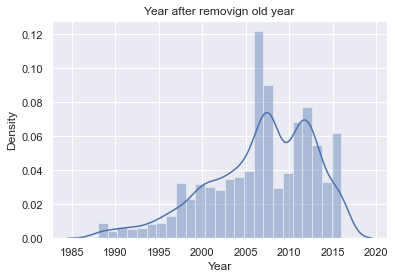

In [16]:
# this time i will keep only 1% data and remove the 99th percentile.
q = car_3['Year'].quantile(0.01);
car_4 = car_3[car_3['Year']>q] # removing the 1th percentile data

# potting again
sns.distplot(car_4['Year']);
plt.title('Year after removign old year');

In [17]:
car_4

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


Now from here i can see that the index is little messed up. It is because we have remove some row from the data but the index is showing fron the raw data . that is why the last index value is not matching with total no of rows.

In [18]:
# reset the indexes
car_clean = car_4.reset_index(drop=True)

# checiking the data
car_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


In [19]:
car_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


Now the row are matching with.

In [20]:
car_raw.shape[0] -  car_clean.shape[0]

158

I have remove total 158 rows from the raw data.

But the original number is `158 + 172 = 330`. because i have remove null value in the begining.

In [21]:
# saving the data for next modeule

car_clean.to_csv('Car_cleaned_with_Model.csv', index=False)
print('Data Saved')

Data Saved
